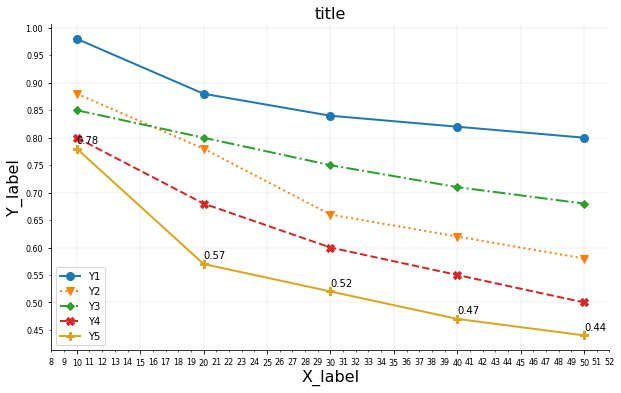

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from decimal import Decimal
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, FuncFormatter
import configparser

cf = configparser.ConfigParser()
cf.read("parameter.conf")

df = pd.DataFrame({'X' :[10,20,30,40,50],
                   'Y1':[0.98,0.88,0.84,0.82,0.8],
                   'Y2':[0.88,0.78,0.66,0.62,0.58],
                   'Y3':[0.85,0.80,0.75,0.71,0.68],
                   'Y4':[0.80,0.68,0.60,0.55,0.50],
                   'Y5':[0.78,0.57,0.52,0.47,0.44],
                   'Y6':[0.75,0.52,0.50,0.45,0.42]})


# font setting
font = {'fontsize': cf['font']['fontsize'],
        'fontweight' : cf['font']['fontweight'],
        'family' : cf['font']['family'],
        'verticalalignment' : cf['font']['verticalalignment'],
        'horizontalalignment' : cf['font']['horizontalalignment']
       }


# allow multiple graphing
FigSize = tuple([float(i) for i in cf['DEFAULT']['figsize'][1:-1].split(",")])
LineWidth = float(cf['DEFAULT']['linewidth'])

fig, ax = plt.subplots(figsize=FigSize)

plt.plot('X', 'Y1', data=df, marker='o', markersize=8, linestyle='-', linewidth=LineWidth)
plt.plot('X', 'Y2', data=df, marker='v', markersize=8, linestyle=':', linewidth=LineWidth)
plt.plot('X', 'Y3', data=df, marker='D', markersize=6, linestyle='-.', linewidth=LineWidth)
plt.plot('X', 'Y4', data=df, marker='X', markersize=8, linestyle='--', linewidth=LineWidth)
plt.plot('X', 'Y5', data=df, marker='P', markersize=8, linestyle='-', linewidth=LineWidth, color='goldenrod')
# marker type: see https://matplotlib.org/api/markers_api.html
# all possible line dash:'-',':', '-.', '--'


# title
plt.title("title", font, loc=cf['title']['location'],pad=cf['title']['pad'])

# legend
# labelpad: Spacing in points between the label and the x-axis.
plt.xlabel('X_label', fontdict=font, labelpad=float(cf['label']['labelpad']))
plt.ylabel('Y_label', fontdict=font, labelpad=float(cf['label']['labelpad']))


# ticks

# avoid overlap of major and minor tick label
def x_minor_tick(x,pos):
    if not x % 5.0:
        return ""
    return "%d" % x

def y_minor_tick(x,pos):
    if not Decimal(str(round(x,2))) % Decimal('0.1'): # deal with modulus for float number
        return ""
    return "%.2f" % x


# set major and minor ticks for x axis
majorLocator = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator) # for the minor ticks, use no labels; default NullFormatter
ax.xaxis.set_minor_formatter(FuncFormatter(x_minor_tick))

# set major and minor ticks for y axis
majorLocator = MultipleLocator(0.1)
majorFormatter = FormatStrFormatter('%.2f')
minorLocator = MultipleLocator(0.05)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.set_major_formatter(majorFormatter)
ax.yaxis.set_minor_formatter(FuncFormatter(y_minor_tick))
ax.tick_params(axis='both', which='major', labelsize=float(cf['ticks']['labelsize']), pad = float(cf['ticks']['pad']))
ax.tick_params(axis='both', which='minor', labelsize=float(cf['ticks']['labelsize']), pad = float(cf['ticks']['pad']))


# present number on graph
for x,y in zip(df['X'].values.tolist(),df['Y5'].values.tolist()):
    plt.text(x, y+0.01, str(round(y,2)), color = cf['DEFAULT']['fontcolor'])


# removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# background grid setting
ax.xaxis.grid(color ='grey', linewidth=float(cf['grid']['linewidth']), alpha=float(cf['grid']['alpha'])) # alpha: soft color
ax.yaxis.grid(color ='grey', linewidth=float(cf['grid']['linewidth']), alpha=float(cf['grid']['alpha'])) # alpha: soft color

plt.legend(ncol=int(cf['legend']['ncol']), loc=cf['legend']['location'])

# save plot as png file
plt.savefig('line chart.png') # save plot as png
plt.show()
